In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import os
%matplotlib inline

Чтение данных

In [3]:
# app_events = pd.read_csv('app_events.csv', dtype={"event_id":np.int32, "device_id": np.int64, 
# "is_installed": np.int8, "is_active": np.int8})
rel_path = os.getcwd()
events = pd.read_csv(os.path.join(rel_path, 'events.csv'))
gender_age = pd.read_csv(os.path.join(rel_path, 'gender_age_train.csv'))
girls = gender_age[gender_age['gender']=='F'].copy()
boys = gender_age[gender_age['gender']=='M'].copy()
phone_brand_dev_model = pd.read_csv(os.path.join(rel_path, 'phone_brand_device_model.csv'))
mapping = pd.read_csv(os.path.join(rel_path, 'brand_mapping.csv'))
phone_brand_dev_model = pd.merge(phone_brand_dev_model, mapping, on='phone_brand')
print phone_brand_dev_model.head()

             device_id phone_brand device_model brand_eng
0 -8890648629457979026          小米           红米    Xiaomi
1  1277779817574759137          小米         MI 2    Xiaomi
2 -3883532755183027260          小米        MI 2S    Xiaomi
3 -5827952925479472594          小米  MI One Plus    Xiaomi
4 -5776341595519925628          小米        MI 2A    Xiaomi


Количество уникальных географических локаций

In [4]:
events['coord'] = zip(events['longitude'], events['latitude'])

print len(set(events.loc[:,'coord'].tolist()))

67161


Самые частые события

In [5]:
most_freq = pd.merge(events, phone_brand_dev_model, on='device_id')
most_freq = most_freq.groupby(['phone_brand']).count().iloc[:,0:1]
most_freq.columns = ['count']
most_freq = most_freq.sort_values(['count'], ascending=False).head(20)
most_freq_list = most_freq.index.tolist()
print most_freq.head()

              count
phone_brand        
华为           941714
小米           625675
三星           402756
vivo         250971
OPPO         233594


In [7]:
print 'Количество строк phone_brand_dev_model до мерджа: ', len(phone_brand_dev_model.index)
most_freq.index = range(len(most_freq.index))
most_freq['phone_brand'] = pd.Series(most_freq_list, index=most_freq.index)
print most_freq.head()

Количество строк phone_brand_dev_model до мерджа:  187245
    count phone_brand
0  941714          华为
1  625675          小米
2  402756          三星
3  250971        vivo
4  233594        OPPO


In [8]:
mstfq_phone_brand_dev_model = pd.merge(phone_brand_dev_model, most_freq, on='phone_brand')
print 'Количество строк phone_brand_dev_model после мерджа: ',len(mstfq_phone_brand_dev_model.index)
print mstfq_phone_brand_dev_model.head()

Количество строк phone_brand_dev_model после мерджа:  181577
             device_id phone_brand device_model brand_eng   count
0 -8890648629457979026          小米           红米    Xiaomi  625675
1  1277779817574759137          小米         MI 2    Xiaomi  625675
2 -3883532755183027260          小米        MI 2S    Xiaomi  625675
3 -5827952925479472594          小米  MI One Plus    Xiaomi  625675
4 -5776341595519925628          小米        MI 2A    Xiaomi  625675


In [10]:
brand_category = pd.merge(gender_age, mstfq_phone_brand_dev_model, on='device_id')

In [12]:
print brand_category.head()
print len(brand_category.index)
# print brand_category['brand_eng']

             device_id gender  age   group phone_brand   device_model  \
0 -1297074871525174196      F   24  F24-26        OPPO            R1C   
1   176515041953473526      M   33  M32-38        vivo            X3T   
2  1596610250680140042      F   36  F33-42          三星      Galaxy S4   
3  2478205222798310601      F   28  F27-28          三星  Galaxy Note 3   
4 -6029676723224952628      F   39  F33-42          三星      Galaxy S6   

  brand_eng   count  
0      OPPO  233594  
1      vivo  250971  
2   samsung  402756  
3   samsung  402756  
4   samsung  402756  
32148


In [13]:
pivot = brand_category.pivot_table(values='gender', index=['group'], columns= ['brand_eng'], aggfunc='count')

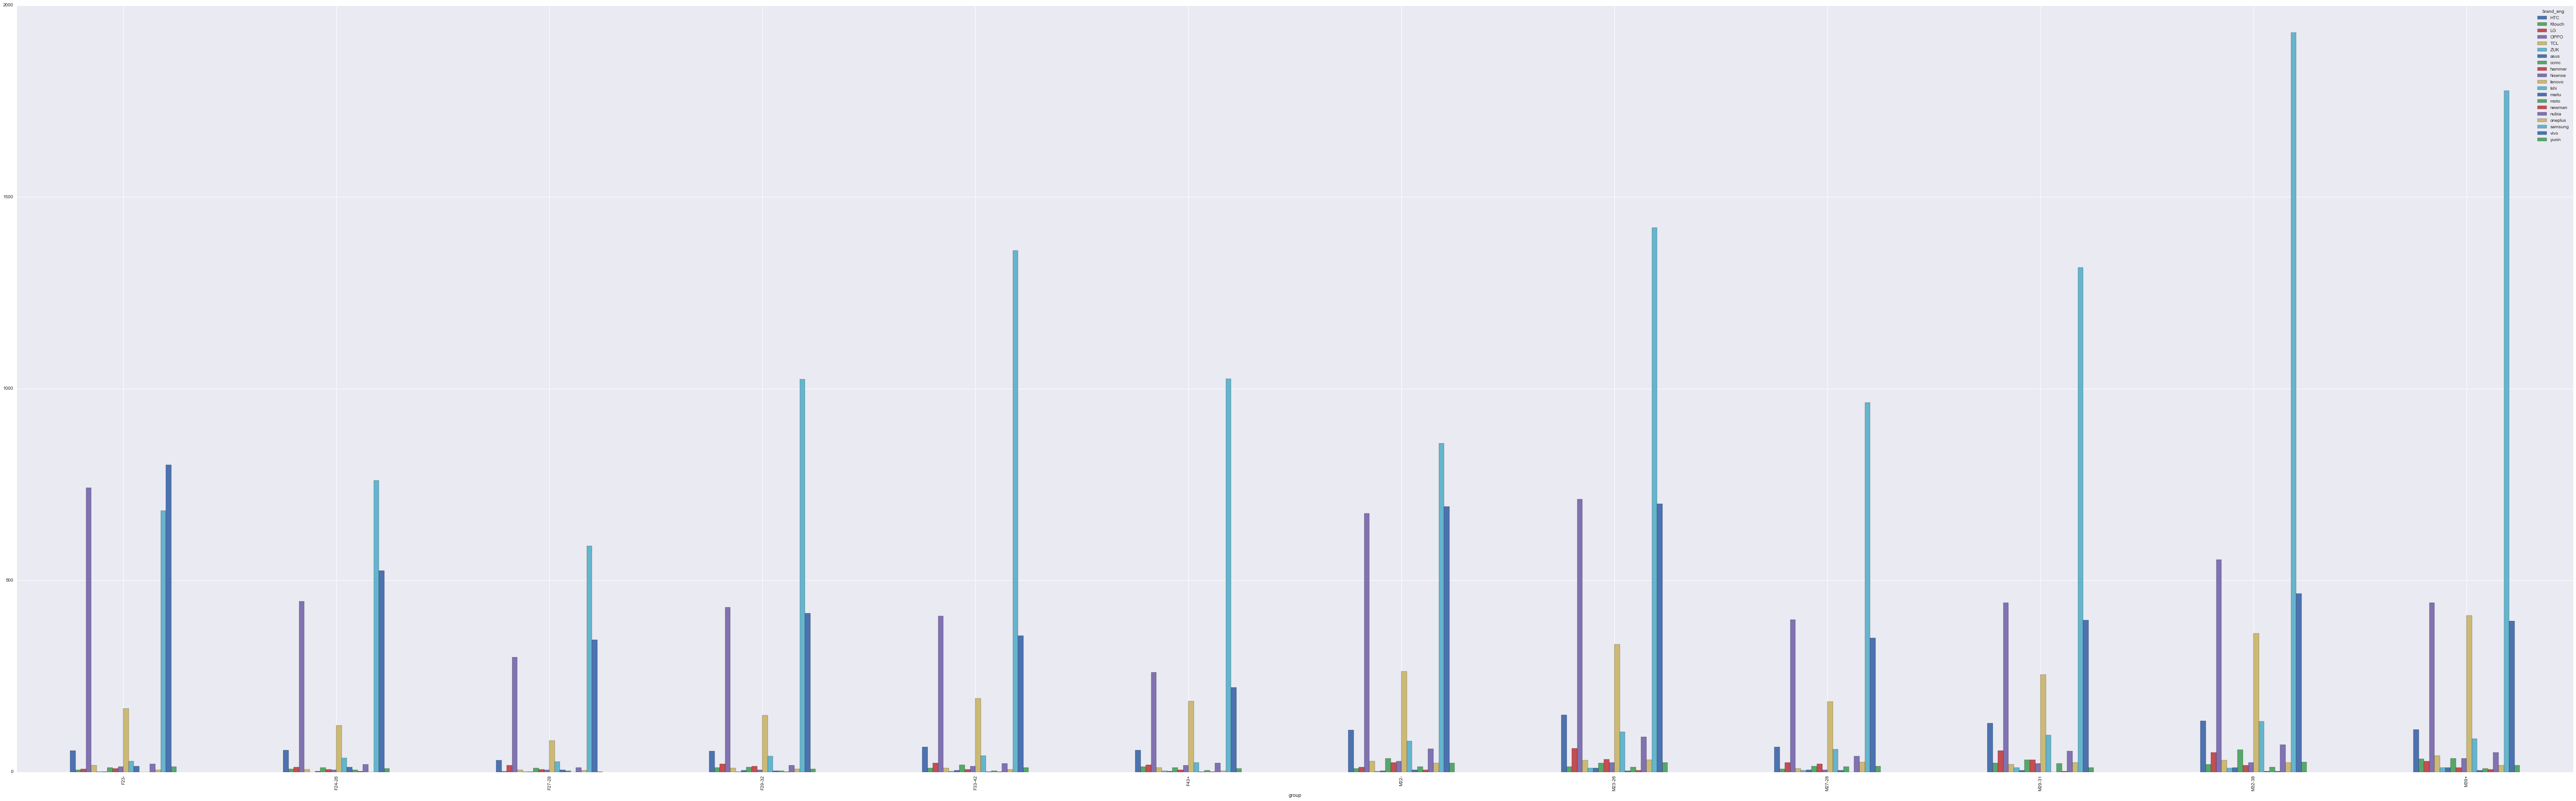

In [14]:
pivot.plot(kind='bar', figsize=(100,30))